In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/datos_limpios.csv')

In [6]:
df.columns

Index(['Unnamed: 0', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RS

In [ ]:
df = pd.read_csv('../data/allinone.csv')

In [7]:
# Agarramos un sample de la base para solo trabajar con ~100K registros en vez de la totalidad de los datos

df_sample = df.sample(n=50_000, random_state=42)

In [8]:
df_sample.to_csv('../data/sample_limpios.csv')

### Exploracion inicial

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225113 entries, 0 to 2225112
Data columns (total 75 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1    Destination Port             float64
 2    Flow Duration                float64
 3    Total Fwd Packets            float64
 4    Total Backward Packets       float64
 5   Total Length of Fwd Packets   float64
 6    Total Length of Bwd Packets  float64
 7    Fwd Packet Length Max        float64
 8    Fwd Packet Length Min        float64
 9    Fwd Packet Length Mean       float64
 10   Fwd Packet Length Std        float64
 11  Bwd Packet Length Max         float64
 12   Bwd Packet Length Min        float64
 13   Bwd Packet Length Mean       float64
 14   Bwd Packet Length Std        float64
 15  Flow Bytes/s                  float64
 16   Flow Packets/s               float64
 17   Flow IAT Mean                float64
 18   Flow IAT Std         

In [6]:
df.describe(include='all')

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Total_Packets,Fwd_Bwd_Packet_Ratio,Duration_per_Packet,Bytes_per_Second,Total_Active_Flags
count,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,...,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2225113,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06,2.225113e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,benign,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1809614,NaN,NaN,NaN,NaN,NaN
mean,1.532902e+06,8.573467e+03,1.595934e+07,5.449007e+00,5.218862e+00,4.326432e+02,4.617155e+03,2.000028e+02,1.694799e+01,5.389739e+01,...,9.474002e+06,4.116477e+05,9.760677e+06,9.146908e+06,NaN,1.066787e+01,1.057761e+00,1.713226e+07,1.048411e+03,7.787375e-01
std,9.652825e+05,1.896537e+04,3.466052e+07,1.463069e+01,2.055569e+01,1.535186e+03,3.555565e+04,5.664579e+02,2.281437e+01,1.450839e+02,...,2.537371e+07,4.282186e+06,2.592374e+07,2.518119e+07,NaN,3.489807e+01,1.618077e+00,3.835476e+07,8.222037e+03,6.835205e-01
min,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,2.272727e-02,-2.600000e+01,0.000000e+00,0.000000e+00
25%,6.572040e+05,5.300000e+01,2.150000e+02,1.000000e+00,1.000000e+00,1.800000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,5.000000e-01,3.015000e+02,1.199939e+01,0.000000e+00
50%,1.787785e+06,8.000000e+01,5.096300e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.620000e+02,4.000000e+01,2.000000e+00,3.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,4.000000e+00,6.666667e-01,7.691700e+04,1.386490e+02,1.000000e+00
75%,2.400123e+06,4.430000e+02,5.204591e+06,5.000000e+00,5.000000e+00,3.270000e+02,1.471000e+03,2.010000e+02,3.700000e+01,5.200000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+01,1.176471e+00,3.489621e+06,3.079350e+02,1.000000e+00


### Asociar puertos con protocolos

    Destination Port: Los puertos destino comunes están asociados a protocolos específicos. Por ejemplo:

        Puerto 80/443: HTTP/HTTPS.

        Puerto 21/22: FTP/SSH.

        Puerto 53: DNS 410.


In [29]:
# Diccionario de puertos comunes y protocolos
protocol_map = {
    80: 'HTTP',
    443: 'HTTPS',
    21: 'FTP',
    22: 'SSH',
    53: 'DNS',
    444: 'SNPP',
    139: 'SMB',
    445: 'SMB',
    8080: 'TCP',
}
# Columna "Inferred Protocol" basada en la columna de los puertos destino
df['Inferred Protocol'] = df[' Destination Port'].map(protocol_map)

# Verificar resultados
print(df['Inferred Protocol'].value_counts())

Inferred Protocol
DNS      788158
HTTP     505084
HTTPS    403591
SSH        9561
FTP        9148
SMB        3370
TCP        2559
SNPP        119
Name: count, dtype: int64


### VISUALIZACIÓN DE LOS DATOS CON SEABORN 


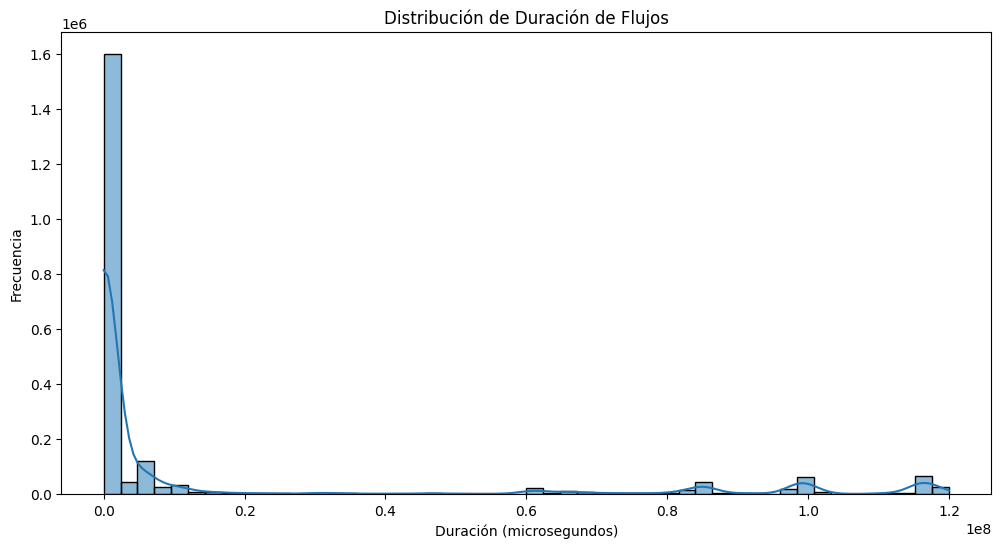

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df[' Flow Duration'], bins=50, kde=True)
plt.title('Distribución de Duración de Flujos')
plt.xlabel('Duración (microsegundos)')
plt.ylabel('Frecuencia')
plt.show()

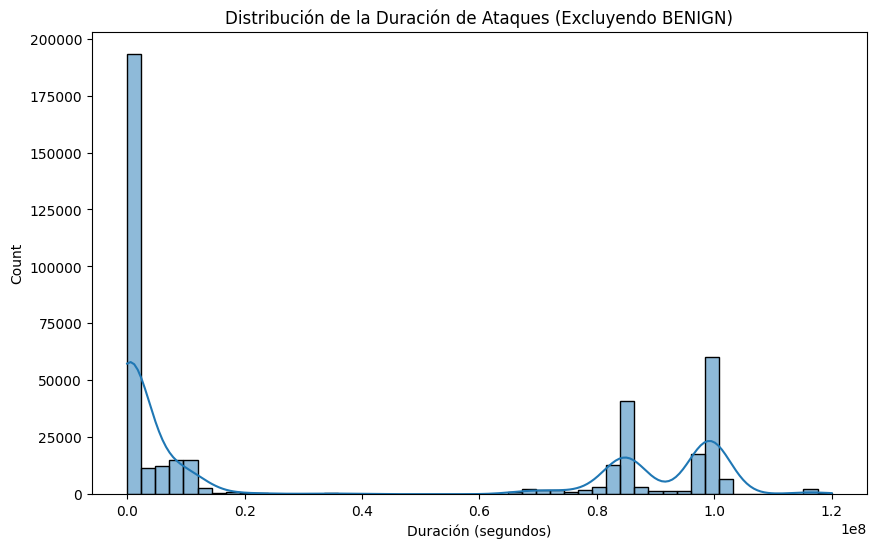

In [33]:
# Ejemplo 1: Histograma con bins ajustados
df_ataques = df[df[' Label'] != 'benign']
plt.figure(figsize=(10, 6))
sns.histplot(df_ataques[' Flow Duration'], bins=50, kde=True)
plt.title('Distribución de la Duración de Ataques (Excluyendo BENIGN)')
plt.xlabel('Duración (segundos)')
plt.show()

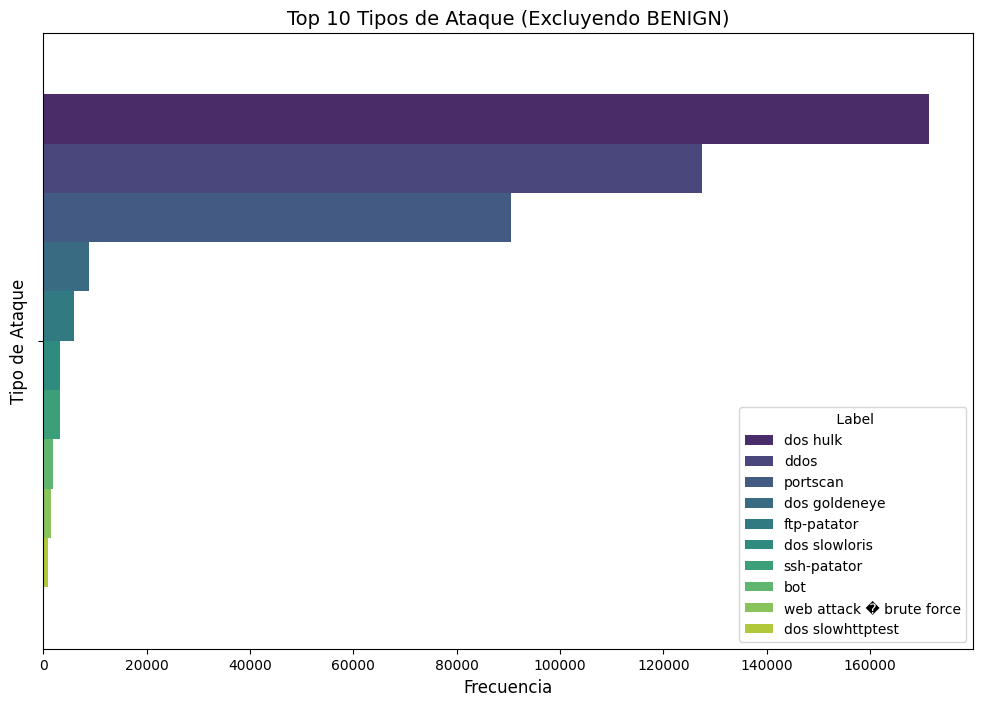

In [11]:
# Contar frecuencias de cada tipo de ataque
top_ataques = df_ataques[' Label'].value_counts().nlargest(10)

# Gráfico de barras horizontales (más legible)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ataques.values, hue=top_ataques.index, palette='viridis')
plt.title('Top 10 Tipos de Ataque (Excluyendo BENIGN)', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Tipo de Ataque', fontsize=12)
plt.show()

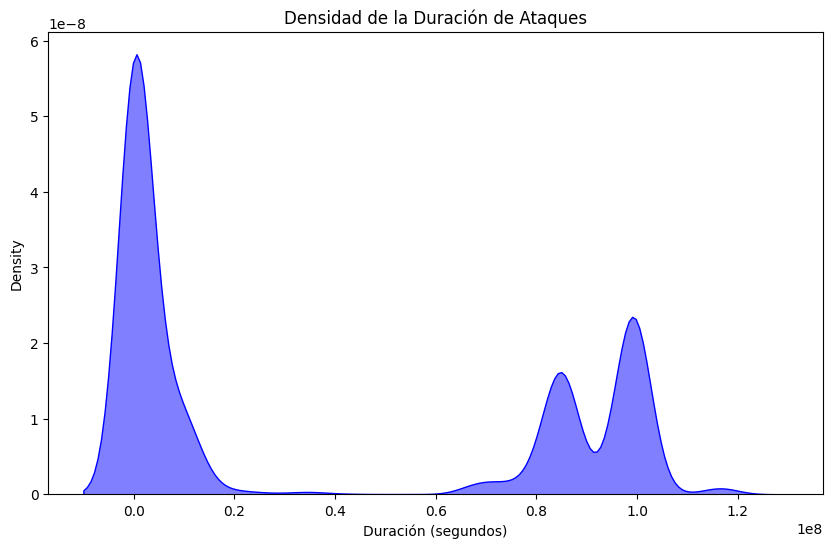

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    df_ataques[' Flow Duration'], 
    fill=True, 
    color='blue', 
    alpha=0.5
)
plt.title('Densidad de la Duración de Ataques')
plt.xlabel('Duración (segundos)')
plt.show()

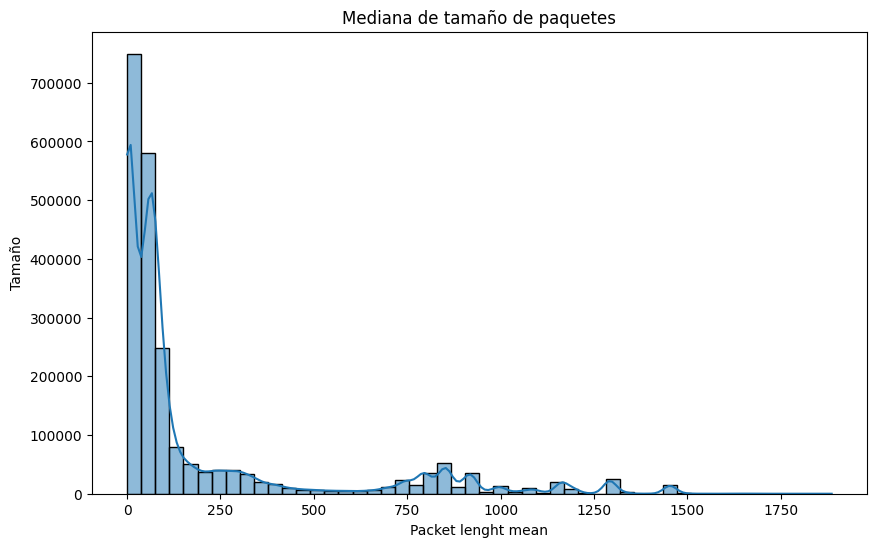

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' Packet Length Mean'], kde=True, bins=50)
plt.title('Mediana de tamaño de paquetes')
plt.xlabel('Packet lenght mean')
plt.ylabel('Tamaño')
plt.show()

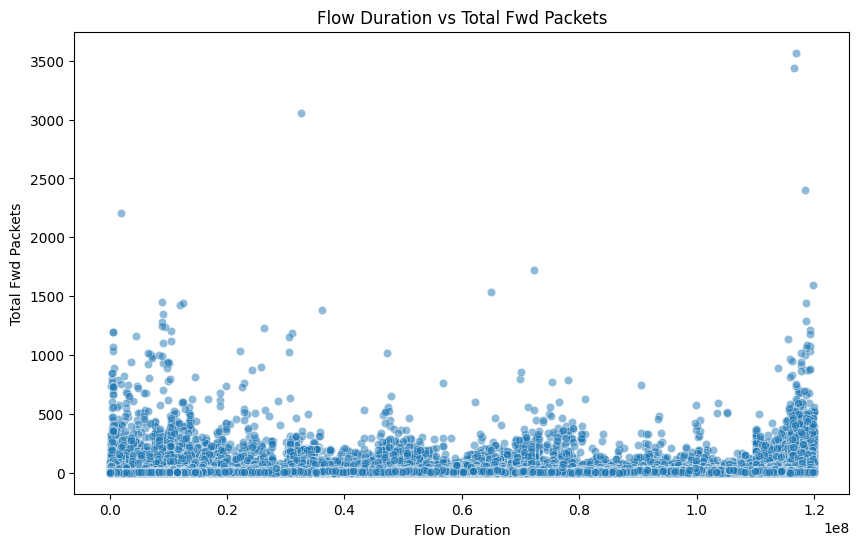

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Flow Duration', y=' Total Fwd Packets', data=df, alpha=0.5)
plt.title('Flow Duration vs Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()


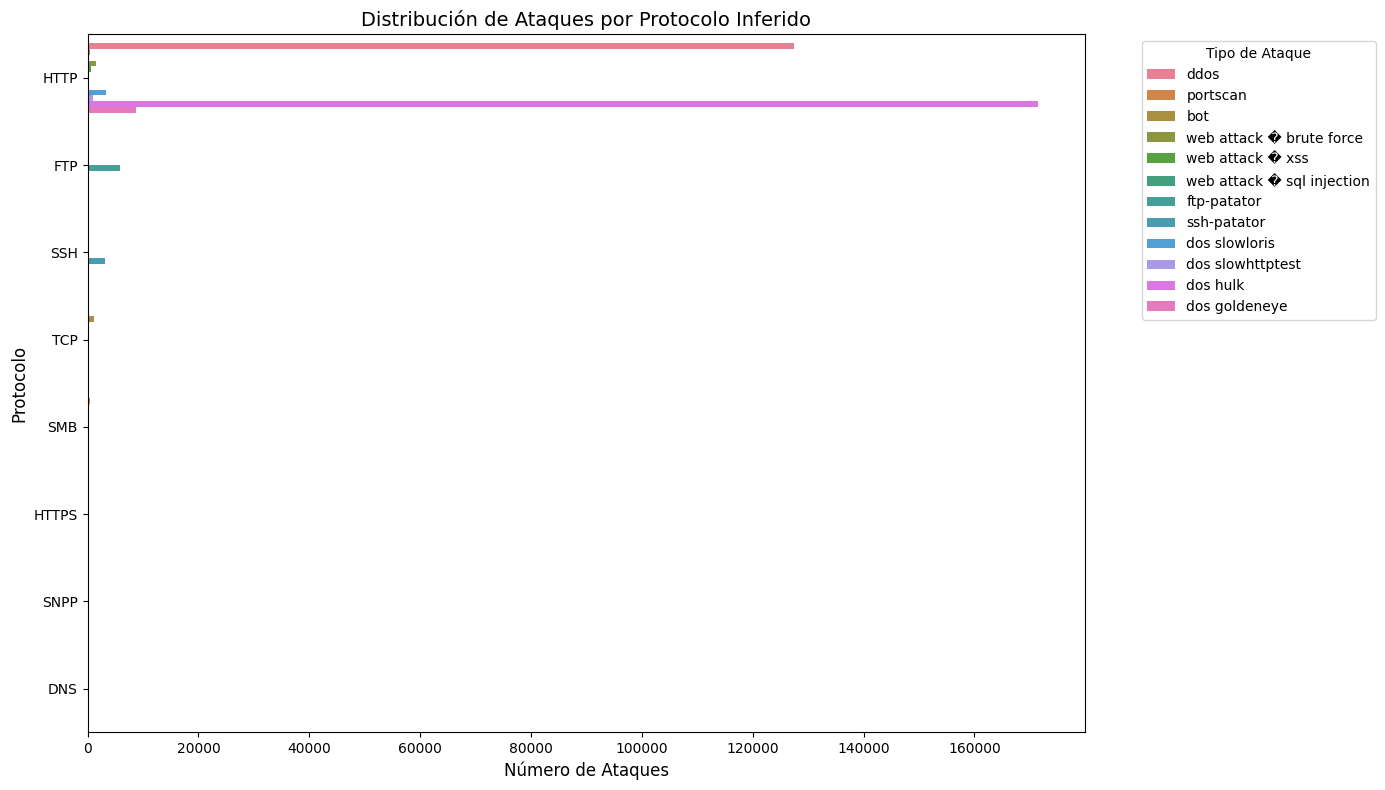

In [34]:
# Gráfico de ataques por protocolo inferido
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df_ataques,
    y="Inferred Protocol", 
    hue=" Label",
    order=df_ataques["Inferred Protocol"].value_counts().index  # Ordenar por frecuencia
)
plt.title("Distribución de Ataques por Protocolo Inferido", fontsize=14)
plt.xlabel("Número de Ataques", fontsize=12)
plt.ylabel("Protocolo", fontsize=12)
plt.legend(title="Tipo de Ataque", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [35]:
# Obtener frecuencias de puertos en ataques (excluyendo BENIGN)
top_ports = df_ataques[" Destination Port"].value_counts().reset_index()
top_ports.columns = ["Puerto Destino", "Número de Ataques"]

# Mapear protocolos a los puertos (usando el diccionario protocol_map)
top_ports["Protocolo Asociado"] = top_ports["Puerto Destino"].map(protocol_map)

# Mostrar tabla con los puertos más comunes
print("Puertos más frecuentes en ciberataques:")
print(top_ports.head(20))  # Muestra los top 20 (ajusta según necesites)

Puertos más frecuentes en ciberataques:
    Puerto Destino  Número de Ataques Protocolo Asociado
0             80.0             314410               HTTP
1             21.0               6172                FTP
2             22.0               3459                SSH
3           8080.0               1310                TCP
4            139.0                196                SMB
5            445.0                179                SMB
6            443.0                146              HTTPS
7            199.0                117                NaN
8            110.0                115                NaN
9            444.0                112               SNPP
10           256.0                112                NaN
11          3306.0                112                NaN
12          1025.0                111                NaN
13           111.0                110                NaN
14           143.0                109                NaN
15           993.0                108           

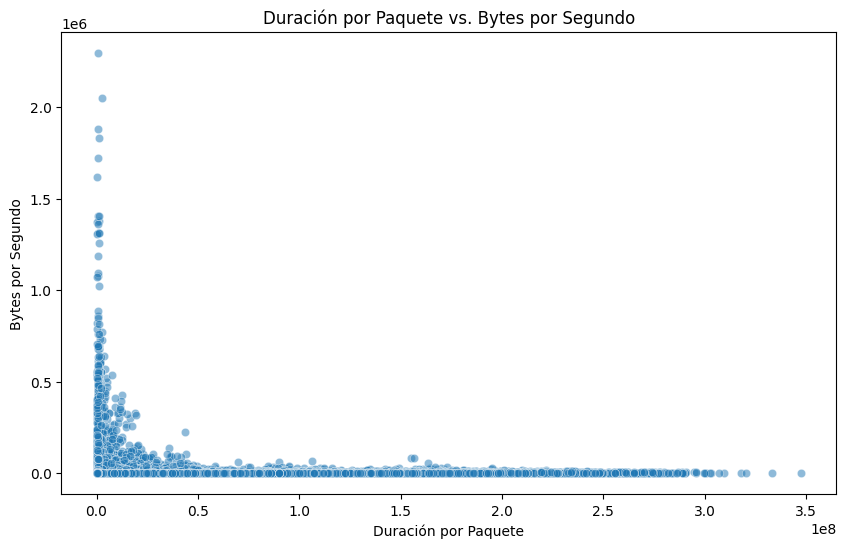

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_per_Packet', y='Bytes_per_Second', data=df, alpha=0.5)
plt.title('Duración por Paquete vs. Bytes por Segundo')
plt.xlabel('Duración por Paquete')
plt.ylabel('Bytes por Segundo')
plt.show()


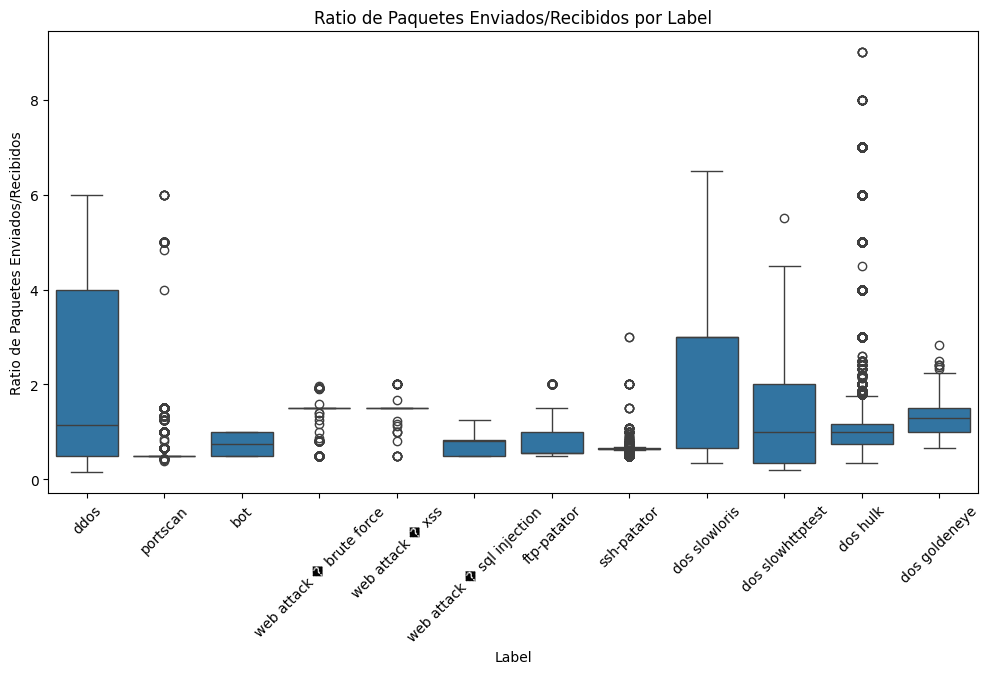

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=' Label', y='Fwd_Bwd_Packet_Ratio', data=df_ataques)
plt.title('Ratio de Paquetes Enviados/Recibidos por Label')
plt.xlabel('Label')
plt.ylabel('Ratio de Paquetes Enviados/Recibidos')
plt.xticks(rotation=45)
plt.show()
